In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv(r'train.csv')

In [42]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


Checking for number of product type labels in 'family' column:

In [6]:
distinct_sentiment_count = df['family'].nunique()
print(f"Number of distinct values in the 'family' column: {distinct_sentiment_count}")

Number of distinct values in the 'family' column: 33


In [7]:
sentiment_counts = df['family'].value_counts()

for family, count in sentiment_counts.items():
    print(f"{family} : {count}")


AUTOMOTIVE : 90936
HOME APPLIANCES : 90936
SCHOOL AND OFFICE SUPPLIES : 90936
PRODUCE : 90936
PREPARED FOODS : 90936
POULTRY : 90936
PLAYERS AND ELECTRONICS : 90936
PET SUPPLIES : 90936
PERSONAL CARE : 90936
MEATS : 90936
MAGAZINES : 90936
LIQUOR,WINE,BEER : 90936
LINGERIE : 90936
LAWN AND GARDEN : 90936
LADIESWEAR : 90936
HOME CARE : 90936
HOME AND KITCHEN II : 90936
BABY CARE : 90936
HOME AND KITCHEN I : 90936
HARDWARE : 90936
GROCERY II : 90936
GROCERY I : 90936
FROZEN FOODS : 90936
EGGS : 90936
DELI : 90936
DAIRY : 90936
CLEANING : 90936
CELEBRATION : 90936
BREAD/BAKERY : 90936
BOOKS : 90936
BEVERAGES : 90936
BEAUTY : 90936
SEAFOOD : 90936


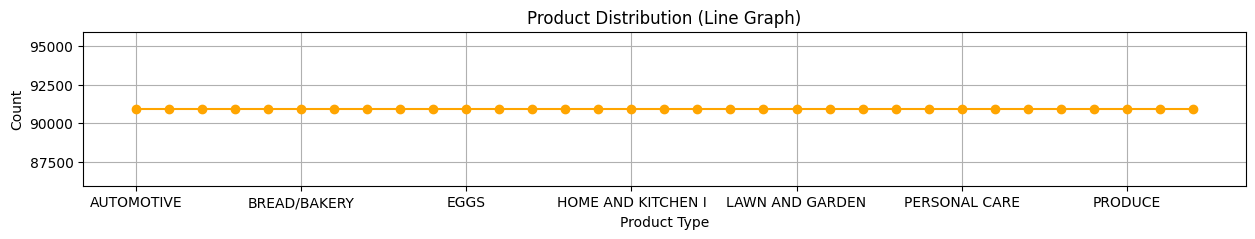

In [9]:
plt.figure(figsize=(15, 2))
sentiment_counts.sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Product Distribution (Line Graph)')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


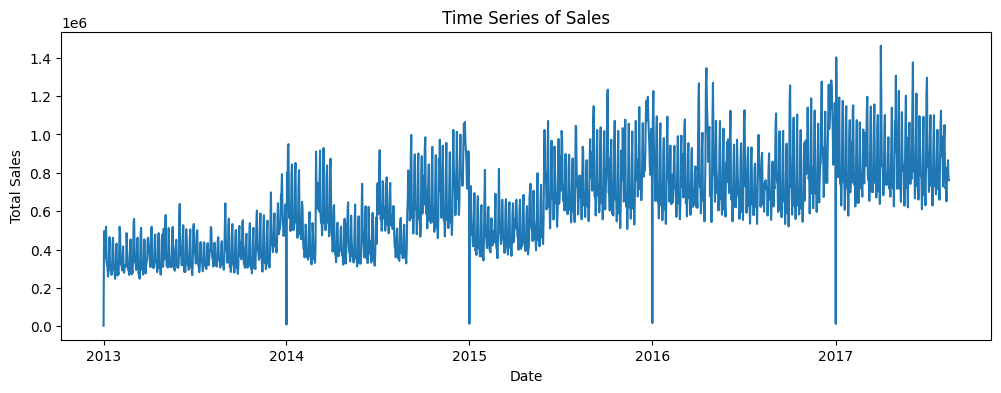

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group by date and sum the sales
daily_sales = df.groupby('date')['sales'].sum()

# Plot time series of sales
plt.figure(figsize=(12, 4))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title('Time Series of Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

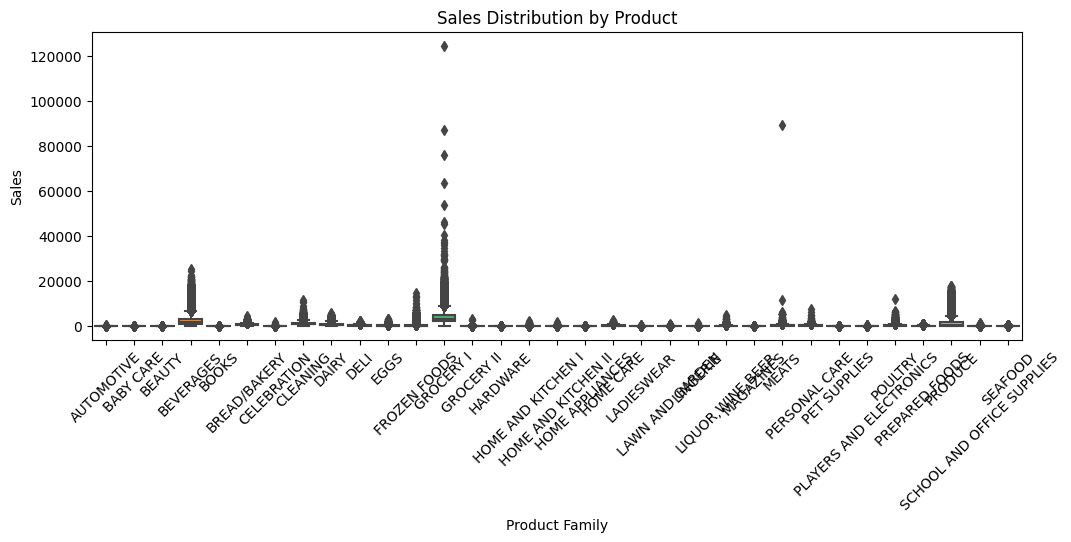

In [14]:
# Plot sales distribution by family
plt.figure(figsize=(12, 4))
sns.boxplot(x='family', y='sales', data=df)
plt.title('Sales Distribution by Product')
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

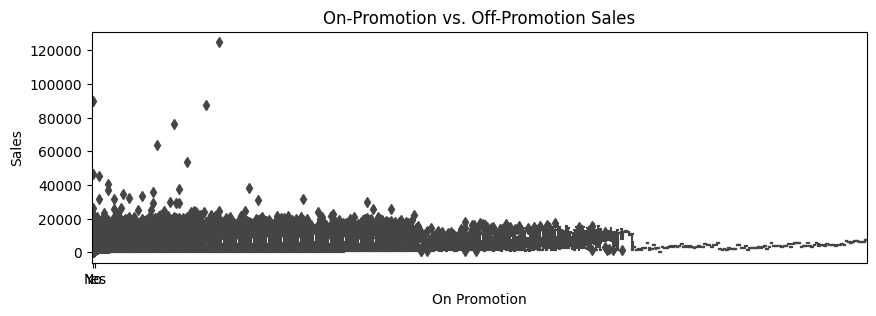

In [16]:
# Plot on-promotion vs. off-promotion sales
plt.figure(figsize=(10, 3))
sns.boxplot(x='onpromotion', y='sales', data=df)
plt.title('On-Promotion vs. Off-Promotion Sales')
plt.xlabel('On Promotion')
plt.ylabel('Sales')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

DATA PREPROCESSING

In [77]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define a function to map dates to seasons
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Add 'seasons' column
df['seasons'] = df['date'].apply(get_season)

# Add 'year' column
df['year'] = df['date'].dt.year

# Drop 'date' column
df.drop('date', axis=1, inplace=True)

# Display the modified DataFrame
df.head()

,id,store_nbr,family,sales,onpromotion,seasons,year
0,0,1,AUTOMOTIVE,0.0,0,Winter,2013
1,1,1,BABY CARE,0.0,0,Winter,2013
2,2,1,BEAUTY,0.0,0,Winter,2013
3,3,1,BEVERAGES,0.0,0,Winter,2013
4,4,1,BOOKS,0.0,0,Winter,2013


In [19]:
null_rows = df[df.isnull().any(axis=1)]
null_rows.sum()

id               0
store_nbr        0
family           0
sales          0.0
onpromotion      0
seasons          0
dtype: object

No Null Rows

In [75]:
from sklearn.preprocessing import LabelEncoder

label_encoder_seasons = LabelEncoder()
df['seasons'] = label_encoder_seasons.fit_transform(df['seasons'])

label_encoder_family = LabelEncoder()
df['family'] = label_encoder_family.fit_transform(df['family'])

df.head()

,id,store_nbr,family,sales,onpromotion,seasons
0,0,1,0,0.0,0,3
1,1,1,1,0.0,0,3
2,2,1,2,0.0,0,3
3,3,1,3,0.0,0,3
4,4,1,4,0.0,0,3


            Applying ML Classification Model

            Training

In [ ]:
df = pd.read_csv(r'train.csv')

In [105]:
df_sarima = df.copy()

In [106]:
df_arima = df.copy()

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'df' is your DataFrame

# Separate features (X) and target variable (y)
X = df[['year', 'seasons', 'family']]
y = df['sales']

# Encode 'seasons' and 'family' using LabelEncoder
label_encoder_seasons = LabelEncoder()
X['seasons'] = label_encoder_seasons.fit_transform(X['seasons'])

label_encoder_family = LabelEncoder()
X['family'] = label_encoder_family.fit_transform(X['family'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

C:\Users\hp\AppData\Local\Temp\ipykernel_1188\3330792242.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['seasons'] = label_encoder_seasons.fit_transform(X['seasons'])
C:\Users\hp\AppData\Local\Temp\ipykernel_1188\3330792242.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['family'] = label_encoder_family.fit_transform(X['family'])


RandomForestRegressor(random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'df_sarima' is your DataFrame

# Separate features (X) and target variable (y)
X = df_sarima[['date', 'family', 'onpromotion']]
y = df_sarima['sales']

# Encode 'family' using LabelEncoder
label_encoder_family = LabelEncoder()
X['family'] = label_encoder_family.fit_transform(X['family'])

# Convert 'date' to datetime
X['date'] = pd.to_datetime(X['date'])

# Extract year from 'date'
X['year'] = X['date'].dt.year

# Extract season from 'date'
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

X['seasons'] = X['date'].dt.month.apply(get_season)

# Drop 'date' column
X.drop('date', axis=1, inplace=True)

# Encode 'seasons' using LabelEncoder
label_encoder_seasons = LabelEncoder()
X['seasons'] = label_encoder_seasons.fit_transform(X['seasons'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SARIMA model
order = (1, 1, 1)  # You need to specify the order based on your data characteristics
seasonal_order = (1, 1, 1, 12)  # You need to specify the seasonal order based on your data characteristics

model = SARIMAX(endog=y_train, exog=X_train, order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model
model_fit = model.fit(disp=False)

# Make predictions on the test set
y_pred = model_fit.predict(exog=X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

            Testing

In [ ]:
test_df = pd.read_csv(r'test.csv')

In [80]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [108]:
df_sarima.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [81]:
from sklearn.preprocessing import LabelEncoder

test_df['date'] = pd.to_datetime(test_df['date'])

# Extract 'year' from 'date'
test_df['year'] = test_df['date'].dt.year

# Define a function to map dates to seasons
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Add 'seasons' column
test_df['seasons'] = test_df['date'].apply(get_season)

# Drop 'date' column
test_df.drop('date', axis=1, inplace=True)

# Encode 'seasons' and 'family' using LabelEncoder
test_df['seasons'] = label_encoder_seasons.transform(test_df['seasons'])
test_df['family'] = label_encoder_family.transform(test_df['family'])

# Make predictions on the test set
test_predictions = model.predict(test_df[['year', 'seasons', 'family']])

# Display the predictions
test_df['predicted_sales'] = test_predictions
print(test_df[['id', 'predicted_sales']])

            id  predicted_sales
0      3000888         7.325494
1      3000889         0.187086
2      3000890         5.765640
3      3000891      3607.091681
4      3000892         0.027866
...        ...              ...
28507  3029395       398.320492
28508  3029396        89.703011
28509  3029397      2351.587519
28510  3029398        14.849556
28511  3029399        19.841474

[28512 rows x 2 columns]


In [84]:
df.head()

,id,store_nbr,family,sales,onpromotion,seasons,year
0,0,1,AUTOMOTIVE,0.0,0,Winter,2013
1,1,1,BABY CARE,0.0,0,Winter,2013
2,2,1,BEAUTY,0.0,0,Winter,2013
3,3,1,BEVERAGES,0.0,0,Winter,2013
4,4,1,BOOKS,0.0,0,Winter,2013


In [87]:
test_df.head()

,id,store_nbr,family,onpromotion,year,seasons,predicted_sales
0,3000888,1,0,0,2017,2,7.325494
1,3000889,1,1,0,2017,2,0.187086
2,3000890,1,2,2,2017,2,5.765640
3,3000891,1,3,20,2017,2,3607.091681
4,3000892,1,4,0,2017,2,0.027866


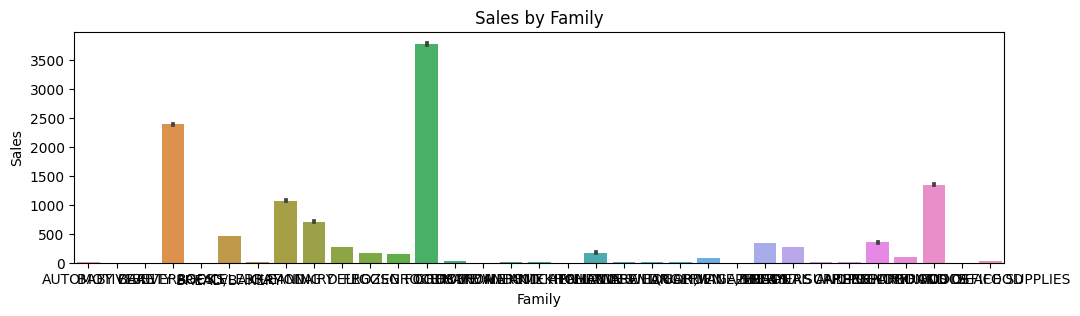

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 3))
sns.barplot(x='family', y='sales', data=df)
plt.title('Sales by Family')
plt.xlabel('Family')
plt.ylabel('Sales')
plt.show()

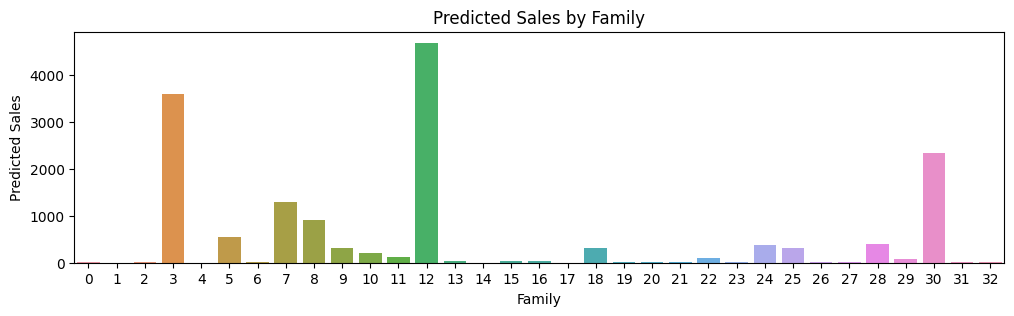

In [90]:
plt.figure(figsize=(12, 3))
sns.barplot(x='family', y='predicted_sales', data=test_df)
plt.title('Predicted Sales by Family')
plt.xlabel('Family')
plt.ylabel('Predicted Sales')
plt.show()

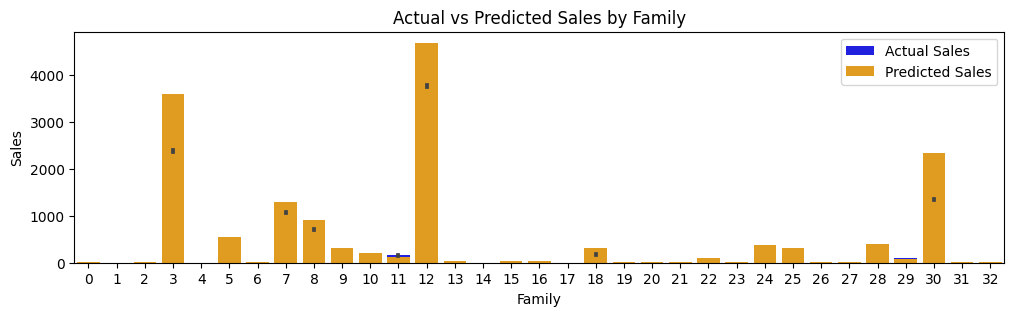

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your original DataFrame
# Assuming 'test_df' is your predictions DataFrame

# Combine the original and predicted data
combined_df = pd.concat([df[['family', 'sales']], test_df[['family', 'predicted_sales']]])

plt.figure(figsize=(12, 3))

# Bar chart for actual sales
sns.barplot(x='family', y='sales', data=df, color='blue', label='Actual Sales')

# Bar chart for predicted sales
sns.barplot(x='family', y='predicted_sales', data=test_df, color='orange', label='Predicted Sales')

plt.title('Actual vs Predicted Sales by Family')
plt.xlabel('Family')
plt.ylabel('Sales')
plt.legend()
plt.show()

            Input-based system to predict sales

In [ ]:
def predict_sales_from_user_input(model):
    # Input from user
    input_year = int(input("Enter the year: "))
    input_season = input("Enter the season (e.g., 'Summer'): ")
    input_family = input("Enter the family: ")

    # Encode season and family using the same LabelEncoders used in training
    season_encoded = label_encoder_seasons.transform([input_season])[0]
    family_encoded = label_encoder_family.transform([input_family])[0]

    # Make prediction using the trained model
    prediction = model.predict([[input_year, season_encoded, family_encoded]])

    return prediction[0]

# Example usage:
predicted_sales = predict_sales_from_user_input(model)
print(f'Predicted Sales: {predicted_sales}')

In [ ]:
import joblib

# Save the trained SARIMA model
joblib.dump(model, r'sarima_model.joblib')